# **ANALYSIS OF THE PRICE VOLATILITY AND THE FACTORS THAT BRING ABOUT PRICE FLUCTUATIONS.**

# **DATA PREPARATIONS**




**1) we start by importing the relevant libraries**

In [80]:
# importing pandas
import pandas as pd

# importing numpy
import numpy as np

# importing datetime
import datetime as dt

**2) Loading our datasets**

In [81]:
# Loading data on food production per capita in  kenya
dfc = pd.read_csv('/content/GDP.csv', delimiter = ',')
dfc.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,1.185788,7.046874,1.991986,1.238042,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,1.050608,1.800226,-0.090708,-10.519749,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.013078,0.328067,0.180223,3.337903,-0.178726,2.212603,3.936671,4.189368,2.648553,0.050826,-0.095421,-2.343192,-1.089417,2.051914,4.409975,5.570030,3.425412,1.789507,2.603876,3.197143,3.526480,3.992607,2.908004,5.656582,6.361804,6.688755,6.857304,4.572539,0.946811,5.152336,4.014183,1.972652,4.308370,3.986754,2.925591,2.019391,2.542298,2.475272,2.077898,-2.939186
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.848719,3.770212,7.272501,5.396356,4.049794,-1.787094,-9.546521,1.465741,15.491934,17.909,10.807508,3.145958,4.213394,10.249852,-2.164314,8.578717,4.726198,-2.194216,5.230790,1.995341,-6.932754,-3.350479,-6.534200,0.559360,5.551687,1.414759,1.448387,4.844282,2.272113,6.562921,1.121069,2.693959,-1.160468,-0.299641,1.927028,4.629048,4.234699,3.506516,1.421036,3.734635,5.212695,9.899591,5.518510,8.013486,5.848351,5.374463,5.530987,6.279223,6.274463,6.957010,4.848351,5.142964,6.104241,5.927350,2.745937,0.127595,2.318042,2.952230,3.190336,-0.884981
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.400001,0.000000,4.200001,6.000002,3.499999,2.900002,4.082749,6.128890,0.041621,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,4.691146,2.181490,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,0.858713,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-5.399987
5,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.745635,2.948597,1.104938,-1.251597,1.780644,5.637243,-0.787843,-1.420040,9.836549,-9.575640,-28.002142,-7.187111,9.559412,8.302867,13.322333,9.099999,-10.919984,8.829424,12.890804,6.946217,8.293313,4.536524,5.528637,5.514668,5.526424,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406,1.417243,1.002018,1.774449,2.218726,3.314981,3.802227,4.019360,2.113420,-3.955398
6,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.649465,8.149743,7.788467,5.618790,0.542206,3.303787,2.838576,1.463000,0.041557,2.208728,-0.132475,1.246461,1.770118,1.784687,2.321433,3.253322,5.547122,5.094326,4.827034,3.781388,2.546004,0.929214,-1.031484,2.383182,2.757502,4.649739,9.067672,3.194793,4.099079,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.952693
7,Arab World,ARB,GDP growth (annual %),NY.GDP

In [82]:
# Loading data on historical CPI series
historical_cpi_series = pd.read_excel('/content/Historical CPI series 2020.xlsx')
historical_cpi_series.head()

,MONTHLY CPI FROM 1962,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Year,Month,Index
2,1962,Mar,0.475034
3,NaN,Jun,0.480142
4,NaN,Sep,0.48525


In [83]:
# Loading data on food production per capital
kenya_food_security = pd.read_csv('/content/food-security-in-kenya-2000-2019-suite-of-food-security-indicators-faostat-per-capita-food-produ.csv')
kenya_food_security.head()

,Year,Value
0,2001,5.8
1,2002,5.5
2,2003,5.5
3,2004,5.5
4,2005,4.2


In [84]:
# Loading data on climate
climate = pd.read_csv('/content/observed-average-annual-precipitation-of-kenya-for-1901-2020.csv')
climate.head()

,Category,Annual Mean,5-yr smooth
0,1901,642.62,666.40
1,1902,713.10,675.39
2,1903,648.55,683.47
3,1904,674.77,689.70
4,1905,727.50,693.19


In [85]:
# Loading data on food prices
df = pd.read_csv('/content/wfp_food_prices_ken.csv')
df.head(8)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,13.0202
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.2959
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,28.5565
4,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17,0.1496
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,10.9968
6,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800,15.8354
7,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39,0.3431


# **DATA CLEANING**

**CLEANING DATA FOR THE HISTORICAL CPI DATA**

In [86]:
# Cleaning the CPI data
# Checking Validity
# Renaming column names
historical_cpi_series.rename(columns={'MONTHLY CPI FROM 1962 ': 'year', 'Unnamed: 1': 'Month', 'Unnamed: 2' : 'CPI'}, inplace=True)

#Checking completeness
# Finding null values and visualizing null values per column in the data set
historical_cpi_series.isnull().describe()
# Filling missing values for year with the foward fill technique
historical_cpi_series['year'] = historical_cpi_series['year'].fillna(method='ffill')
# Checking for any reamaining null values
historical_cpi_series.isnull().describe()

# Checking Validity
# Creating a new column day with a arbitrary value 01
historical_cpi_series['Day'] ='01'
# Dropping the first two rows with irrellevant data
historical_cpi_series = historical_cpi_series.drop([historical_cpi_series.index[0], historical_cpi_series.index[1]])
# Visualizing the month column
historical_cpi_series['Month'].unique()
# Replacing the months with appropiate numerical reprsentations
historical_cpi_series = historical_cpi_series.replace(['Mar', 'Jun', 'Sep', 'Dec', 'Jan', 'Feb', 'Apr', 'May', 'Jul', 'Aug', 'Oct', 'Nov'], ['03', '06', '09', '12', '01', '02', '04', '05', '07', '08', '10', '11'])
# Converting year column from object to integer
historical_cpi_series['year'] = historical_cpi_series['year'].astype(int)
# Dropping all data of the years before 2006
historical_cpi_series = historical_cpi_series[historical_cpi_series['year'] >= 2006]
# Converting year column from integer to string
historical_cpi_series['year'] = historical_cpi_series['year'].astype(str)
# converting CPI column from integer to str
historical_cpi_series['CPI'] = historical_cpi_series['CPI'].astype(str)
# Joining the year month and day columns to form a new column date
historical_cpi_series['Date'] = historical_cpi_series[['year', 'Month', 'Day']].agg('-'.join, axis = 1)
# Converting the column date from object to date time
historical_cpi_series['Date'] = pd.to_datetime(historical_cpi_series['Date'])
# Drop the date and month column
historical_cpi_series = historical_cpi_series.drop(['Month', 'Day'], axis = 1)
# Convert CPI Column to integer
historical_cpi_series['CPI'] = historical_cpi_series['CPI'].astype(float)
# visualizing the cleaned data and getting data types
historical_cpi_series.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 354 to 530
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    177 non-null    object        
 1   CPI     177 non-null    float64       
 2   Date    177 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.5+ KB


Checking completeness;
- The historical CPI Series was queried for null values
- The null values were studied observed only on the year column.
- The empty spaces in year column was due to data input format that inserted the one year and the months for that year the data was collected leaving many spaces.
- The null values were filled using the foward fill technique
- No further null values were observed after this step

Checking data validity;
- The column names containing data on year, month and CPI   were renamed appropiately to year, month and CPI
- A new column day was added with an arbitrary value 01, for later joining to form new column date
- All the columns that weren't in string format were converted to strings
- The year, month and day column were merged to form form a new column date
- The date column was then converted to date time format
- The year column was then converted to integer and all dates lower than 2006 were dropped 
- The CPI data was then reconverted to float value


In [87]:
# checking for duplicates using the duplicated method
historical_cpi_series.duplicated().any()

False

There were no duplicate datasets in the dataframe containing CPI information

In [88]:
# getting Average CPI per year(Group by year the CPI and find mean)
average_cpi_per_year = historical_cpi_series['CPI'].groupby(historical_cpi_series['year']).mean().reset_index()
# Creating a dataframe from the grouped CPI's
average_cpi_per_year = pd.DataFrame(average_cpi_per_year)
# Visualizing the newly grouped table
average_cpi_per_year
#Renaming the column name from CPI to average_cpi_per_year
average_cpi_per_year.rename(columns={'CPI': 'av CPI per year'}).head(1)
average_cpi_per_year.head()

,year,CPI
0,2006,39.305230
1,2007,40.983774
2,2008,47.178007
3,2009,52.149336
4,2010,54.279033


## Kenyan commodity prices data cleaning

In [89]:
# we now have to check the columnns of the dataset with missing values

df.isnull().any()
# To understand how many distinct dates are involved in this dataset

df['date'].unique()
# we can preview the dataset in terms of its properties to see whether we can change some properties or not

df.describe()
# As per our data understanding ,we found three data columns to be not relevant to the research problem.
# we will drop them since we will not need them in our analysis
# Columns like latitude, longitude and priceflag were dropped because they are not ralevant to our research problem.
df.drop(["latitude", "longitude" , "priceflag"  ], axis = 1, inplace = True) 
# dropping the first row

df = df.drop([0], axis=0)
# We have to check the accuracy of the dataset in terms of the right datatype for each column
df['date'] = pd.to_datetime(df['date'])
formatted_df = df['date'].dt.strftime("%m/%d/%y")
# Change the datatype to the right datatype
df["price"] = df["price"].astype(float)
df["usdprice"] = df["usdprice"].astype(float)
df.rename({'admin1':'Regions', 'admin2':'Sub_region'}, axis='columns', inplace = True)
df.duplicated().any
# Splitting the date column to day month year
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df.head()
# Grouped datasets
df.columns
df['grouped'] =1       #initially, set that counter to 1.
group_data = df.groupby(['Regions', 'Sub_region', 'market', 'category', 'commodity',
       'unit', 'year', 'pricetype', 'currency'])['price'].mean().reset_index()#sum function
group_data 
commodity_prices = pd.DataFrame(group_data)
commodity_prices.sort_values(by='year', ascending=True).head()
#commodity_prices.info()
# Convert year to float
commodity_prices['year'] = commodity_prices['year'].astype(str)
commodity_prices.head(20)

,Regions,Sub_region,market,category,commodity,unit,year,pricetype,currency,price
0,Central,Nyeri,Karatina (Nyeri),cereals and tubers,"Maize (white, dry)",90 KG,2021,Wholesale,KES,3001.500000
1,Central,Nyeri,Karatina (Nyeri),cereals and tubers,Millet (finger),90 KG,2021,Wholesale,KES,8100.000000
2,Central,Nyeri,Karatina (Nyeri),cereals and tubers,"Potatoes (Irish, red)",50 KG,2021,Wholesale,KES,1177.110000
3,Central,Nyeri,Karatina (Nyeri),cereals and tubers,Sorghum (red),90 KG,2021,Wholesale,KES,5400.000000
4,Central,Nyeri,Karatina (Nyeri),pulses and nuts,Beans (kidney),90 KG,2021,Wholesale,KES,6201.000000
5,Central,Nyeri,Karatina (Nyeri),pulses and nuts,Beans (mung),90 KG,2021,Wholesale,KES,11997.000000
6,Central,Nyeri,Karatina (Nyeri),pulses and nuts,Beans (yellow),90 KG,2021,Wholesale,KES,8001.000000
7,Central,Nyeri,Karatina (Nyeri),vegetables and fruits,Cabbage,126 KG,2021,Wholesale,KES,1197.133333
8,Central,Nyeri,Karatina (Nyeri),vegetables and fruits,Kale,50 KG,2021,Wholesale,KES,639.110000
9,Central,Nyeri,Karatina (Nyeri),vegetables and fruits,Onions (dry),13 KG,2021,Wholesale,KES,660.776667


## Rainfall data Datacleaning

In [90]:
# Creating dataframe with desired years
climate_kenya = climate[climate['Category'] > 2005].reset_index()
climate_kenya.head()
# To confirm DataFrame dimensions
climate_kenya.shape

# Checking for missing values
climate_kenya.isnull().any()
climate_kenya.head(10)

,index,Category,Annual Mean,5-yr smooth
0,105,2006,769.28,644.61
1,106,2007,692.64,649.83
2,107,2008,661.27,657.11
3,108,2009,655.41,665.90
4,109,2010,650.73,675.62
5,110,2011,626.92,686.34
6,111,2012,783.07,699.07
7,112,2013,740.69,714.89
8,113,2014,608.32,734.88
9,114,2015,778.31,760.14


In [91]:
#Removing white spaces on column name and changing to lower case
climate_kenya.columns = climate_kenya.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
climate_kenya.head()

# Creating a function to drop unnecessary columns
def dropping_columns(data,cols):
  data.drop(cols, axis = 1, inplace = True)

  return data

columns = ['index', '5-yr_smooth']
climate_kenya = dropping_columns(climate_kenya, columns)

# checking for duplicates
climate_kenya.duplicated().any()

# Renaming the column category to year
climate_kenya.rename({'category':'year', 'annual_mean':'annual_rainfall'}, axis = 1, inplace = True)
climate_kenya.head()
# Convert year to float
climate_kenya['year'] = climate_kenya['year'].astype(str)
climate_kenya.head(10)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,year,annual_rainfall
0,2006,769.28
1,2007,692.64
2,2008,661.27
3,2009,655.41
4,2010,650.73
5,2011,626.92
6,2012,783.07
7,2013,740.69
8,2014,608.32
9,2015,778.31


## Consumer production per capita

In [92]:
# CLEANING

# 1. Validity
# procedure: removing irrelevant observations
# data cleaning action: removing 2001 - 2005 rows
# explanation: they're not relevant to our study


food = kenya_food_security.drop([0, 1, 2, 3, 4])
food
# resetting index
# food_security = food.reset_index()

# dropping index
food.reset_index(drop=True, inplace=True)




# 2. Completeness
# procedure: check for missing values 
# data cleaning action: check for missing values as a whole
# explanation: missing values result to incomplete analysis

food.isnull()

# 4. Consistency 
# *** no duplicates observed ***

# 3. Uniformity
# changing 'Year' to lower

food.rename(columns = {'Year':'year'}, inplace = True)

# procedure: Starndadization - data types
# data cleaning action: changing yeat to datetime 
# explanation: all the other datasets have year as datetime because we'll merge

# checking data types 
food.dtypes

# changing year to datetime
# food_security['Year'] = food_security['Year'].astype('datetime64[ns]')
# df['Date'] = df['Date'].astype('datetime64[ns]')

# checking data types again
food.dtypes
# Convert year to float
food['year'] = food['year'].astype(str)

food.head(10)

,year,Value
0,2006,7.0
1,2007,9.0
2,2008,8.7
3,2009,7.2
4,2010,2.5
5,2011,2.9
6,2012,4.9
7,2013,5.4
8,2014,5.6
9,2015,5.8


## GDP growth data cleaning

In [93]:

#To get the data from the country name Kenya

df_kenya = dfc[dfc['Country Name'] == "Kenya"]
df_kenya

# # To preview which columns are null

df_kenya.isnull()

# # lets understand the datatype

#df_kenya.info()

# # lets get the properties of the data

df_kenya.describe()

# # We drop column that wont be used to analyse the business objectives


#df_kenya.drop(df_kenya.loc[:,'1960':'2005'].columns, axis = 1, inplace = True)

#df_kenya.head()

# # we now transpose the dataset we want

df_kenya = df_kenya.transpose()
df_kenya
# # converting to CSV file
# df_kenya.to_csv("Annual_GDP_growth.csv")

# # reseting the index

df_kenya = df_kenya.reset_index()
df_kenya

# # we need to drop the first colums and rename the column names

df_kenya = df_kenya.drop([0,1,3], axis=0)
df_kenya

# # resets the index

df_kenya = df_kenya.reset_index()
df_kenya

# # Drop the level_o column(last index created)

df_kenya.drop(["level_0"], axis = 1, inplace = True) 

df_kenya.head()

# # Renaming the column names

df_kenya.rename({'index':'year', 121:'GDP_growth_annual%'}, axis='columns', inplace = True)
df_kenya


# # we need to drop the first colums and rename the column names

df_kenya = df_kenya.drop([0], axis=0 )
df_kenya

# # reseting the index

df_kenya = df_kenya.reset_index()
df_kenya

# # Drop the new index again
df_kenya.drop(["index"], axis = 1, inplace = True) 

df_kenya

# # Lets preview the data we have


# Convert year to float
df_kenya['GDP_growth_annual%'] = df_kenya['GDP_growth_annual%'].astype(float)
df_kenya['GDP_growth_annual%'] = df_kenya['GDP_growth_annual%'] / 100
# Convert year to float
df_kenya['year'] = df_kenya['year'].astype(int)
df_kenya.info()
# Drop values below 2006
df_kenya = df_kenya[df_kenya['year'] > 2005]
df_kenya.head()
df_kenya.reset_index(drop=True, inplace=True)
df_kenya.head()
df_kenya['year'] = df_kenya['year'].astype(str)
df_kenya.info()
df_kenya.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                61 non-null     int64  
 1   GDP_growth_annual%  60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                15 non-null     object 
 1   GDP_growth_annual%  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


,year,GDP_growth_annual%
0,2006,0.064725
1,2007,0.068507
2,2008,0.002323
3,2009,0.033069
4,2010,0.080585
5,2011,0.051211
6,2012,0.045687
7,2013,0.037978
8,2014,0.050201
9,2015,0.049677


## Merge frames

In [94]:
# We endeavour to merge all of the cleaned datasets into one unified data pool

average_cpi_per_year.columns
df10 = average_cpi_per_year.merge(df_kenya, how = 'left', on = 'year')
df10

df11 = df10.merge(climate_kenya, how = 'left', on = 'year')
df11
df12 = df11.merge(food, how = 'left', on = 'year')
df12
df13 = df12.merge(commodity_prices, how = 'left', on = 'year')
df13.info()
df13.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                605 non-null    object 
 1   CPI                 605 non-null    float64
 2   GDP_growth_annual%  605 non-null    float64
 3   annual_rainfall     605 non-null    float64
 4   Value               355 non-null    float64
 5   Regions             605 non-null    object 
 6   Sub_region          605 non-null    object 
 7   market              605 non-null    object 
 8   category            605 non-null    object 
 9   commodity           605 non-null    object 
 10  unit                605 non-null    object 
 11  pricetype           605 non-null    object 
 12  currency            605 non-null    object 
 13  price               605 non-null    float64
dtypes: float64(5), object(9)
memory usage: 70.9+ KB


,year,CPI,GDP_growth_annual%,annual_rainfall,Value,Regions,Sub_region,market,category,commodity,unit,pricetype,currency,price
0,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,Wholesale,KES,19.920000
1,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,Wholesale,KES,1411.132500
2,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,Wholesale,KES,34.437500
3,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3202.829167
4,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Maize (white),KG,Retail,KES,19.666667
5,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1520.825000
6,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Sorghum,90 KG,Wholesale,KES,1950.000000
7,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,pulses and nuts,Beans (dry),KG,Retail,KES,46.000000
8,2006,39.30523,0.064725,769.28,7.0,Eastern,Marsabit,Marsabit,cereals and tubers,Maize (white),KG,Retail,KES,21.250000
9,2006,39.30523,0.064725,769.28,7.0,Nairobi,Nairobi,Nairobi,cereals and tubers,Bread,400 G,Retail,KES,26.166667


## Exporting data

In [95]:
# Exporting data one
from google.colab import files
df13.to_csv('project_analysis.csv')
files.download('project_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
# Exporting data 2
df13.to_csv("Project_Analysis.csv")
df13


,year,CPI,GDP_growth_annual%,annual_rainfall,Value,Regions,Sub_region,market,category,commodity,unit,pricetype,currency,price
0,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,Wholesale,KES,19.920000
1,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,Wholesale,KES,1411.132500
2,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,Wholesale,KES,34.437500
3,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3202.829167
4,2006,39.305230,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Maize (white),KG,Retail,KES,19.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Maize,KG,Wholesale,KES,31.222500
601,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Maize (white),90 KG,Wholesale,KES,3000.000000
602,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1821.943333
603,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Sorghum,90 KG,Wholesale,KES,5400.000000


In [97]:
df13.head()

,year,CPI,GDP_growth_annual%,annual_rainfall,Value,Regions,Sub_region,market,category,commodity,unit,pricetype,currency,price
0,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,Wholesale,KES,19.920000
1,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,Wholesale,KES,1411.132500
2,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,Wholesale,KES,34.437500
3,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3202.829167
4,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Maize (white),KG,Retail,KES,19.666667


# **ANSWERING BUSINESS OBJECTIVES (OUR DATA ANALYSIS)**

# **OBJECTIVE 1**

 1) **ANALYSIS OF THE RELATIONSHIP/CORRELATION BETWEEN THE CONSUMER PRICE INDEX AND FOOD PRICE VOLATILITY.**

In [98]:
# First we want to extract the relevant data we will use for the analysis of CPI on the relevant commodity price flactuation

five_minutes_lol = df13.groupby(['year', 'CPI', 'commodity'])['price'].mean()
five_minutes_lol.head(30)


year  CPI        commodity              
2006  39.305230  Beans                        38.663958
                 Beans (dry)                2599.399167
                 Bread                        26.166667
                 Maize                        16.315833
                 Maize (white)               709.330938
                 Milk (cow, pasteurized)      22.500000
                 Oil (vegetable)             120.250000
                 Potatoes (Irish)           1035.276799
                 Sorghum                    1651.061124
2007  40.983774  Beans                        39.169375
                 Beans (dry)                2549.496500
                 Bread                        28.333333
                 Maize                        12.385278
                 Maize (white)               614.079479
                 Milk (cow, pasteurized)      21.083333
                 Oil (vegetable)             134.583333
                 Potatoes (Irish)            979.523958
       

In [99]:
# We reset the index so that we can have a structured dataset for plotting and what nots
# This data will show 

five_minutes_lol = df13.groupby(['year', 'CPI', 'commodity'])['price'].mean()
df14 = five_minutes_lol.reset_index()
df14.head(30)

,year,CPI,commodity,price
0,2006,39.305230,Beans,38.663958
1,2006,39.305230,Beans (dry),2599.399167
2,2006,39.305230,Bread,26.166667
3,2006,39.305230,Maize,16.315833
4,2006,39.305230,Maize (white),709.330938
5,2006,39.305230,"Milk (cow, pasteurized)",22.500000
6,2006,39.305230,Oil (vegetable),120.250000
7,2006,39.305230,Potatoes (Irish),1035.276799
8,2006,39.305230,Sorghum,1651.061124
9,2007,40.983774,Beans,39.169375


In [118]:
# We picked a sample that would act as a unit measure to represent the rest of the statistics

df15 = df14[df14['commodity'] == 'Maize']
df15

,year,CPI,commodity,price
3,2006,39.305230,Maize,16.315833
12,2007,40.983774,Maize,12.385278
21,2008,47.178007,Maize,20.559881
30,2009,52.149336,Maize,26.123762
39,2010,54.279033,Maize,18.956071
48,2011,61.890025,Maize,31.154067
57,2012,67.694234,Maize,33.040167
66,2013,71.564647,Maize,31.460583
78,2014,76.486974,Maize,31.498333
90,2015,81.521379,Maize,28.634273


In [101]:
#Percentage change of CPI giving a picture of the rate of inflation.

percentage_change_CPI = df15['CPI'].pct_change()
df2 = percentage_change_CPI.reset_index()
df2.drop(["index"], axis=1 , inplace = True) 
df2
df16 = df2.drop([0], axis=0)
df17 = df16.reset_index()
df17
df17.drop(["index"], axis=1 , inplace = True)
df17
df17.rename({'CPI':'percentage_change_in_CPI (inflation)'}, axis='columns', inplace = True)
df17

,percentage_change_in_CPI (inflation)
0,0.042705
1,0.151139
2,0.105374
3,0.040838
4,0.140220
5,0.093783
6,0.057175
7,0.068782
8,0.065820
9,0.063176


In [102]:
#Percentage change of maize prices giving a picture of the price fluctuation.

percentage_change_maize = df15['price'].pct_change()
df4 = percentage_change_maize.reset_index()
df4.drop(["index"], axis=1 , inplace = True) 
df4
df5 = df4.drop([0], axis=0)
df6 = df5.reset_index()
df6
df6.drop(["index"], axis=1 , inplace = True)
df6
df6.rename({'price':'percentage_change_in_maize_price'}, axis='columns', inplace = True)
df6

,percentage_change_in_maize_price
0,-0.240904
1,0.660026
2,0.270618
3,-0.274374
4,0.643488
5,0.060541
6,-0.047808
7,0.001200
8,-0.090927
9,0.051958


In [103]:
# merging the two datasets for plotting

Inflation_price_comparison = df17.join(df6)
Inflation_price_comparison

,percentage_change_in_CPI (inflation),percentage_change_in_maize_price
0,0.042705,-0.240904
1,0.151139,0.660026
2,0.105374,0.270618
3,0.040838,-0.274374
4,0.140220,0.643488
5,0.093783,0.060541
6,0.057175,-0.047808
7,0.068782,0.001200
8,0.065820,-0.090927
9,0.063176,0.051958


**1.2) First we plot a line graph of the CPI and the weighted average prices of all the commodities in a given year.**

(10.0, 9000.0)

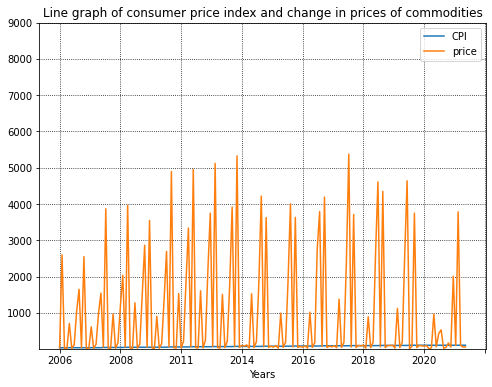

In [104]:
# We plot a line graph

import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams


df14.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of consumer price index and change in prices of commodities')
plt.xlabel ("Years")
plt.ylim(10,9000)

**1.3) We plot a line graph of CPI and the sample stat Maize to represent the commodities of the given year, so that we can study its price fluctuation against CPI.**

(10.0, 150.0)

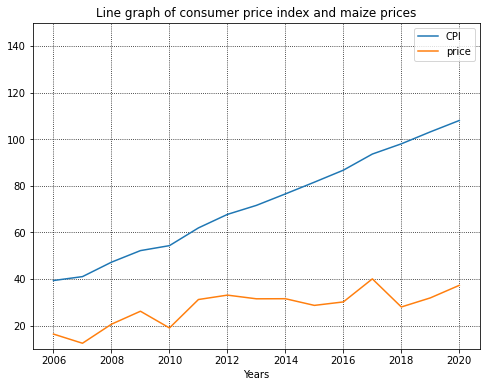

In [105]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams


df15.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of consumer price index and maize prices')
plt.xlabel ("Years")
plt.ylim(10,150)


**1.4) We represent a line graph of CPI trendline.**

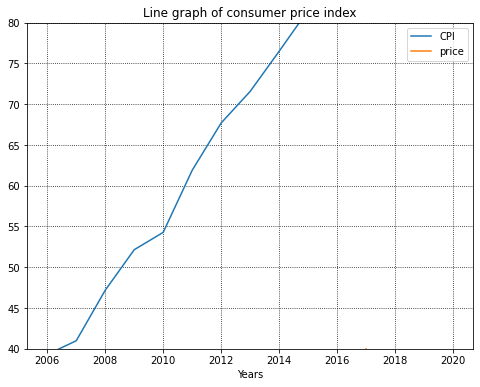

In [106]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams


df15.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of consumer price index')
plt.xlabel ("Years")
plt.ylim(40,80)
rcParams['figure.figsize'] = (5,5)

**1.5) We  represent a graph of Maize price fluctuation trendline.**

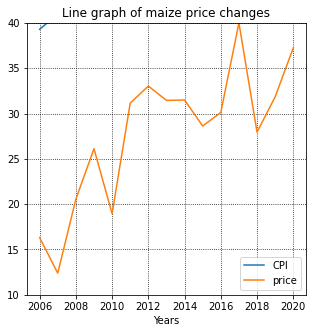

In [107]:
# We plot a line graph

import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams


df15.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of maize price changes')
plt.xlabel ("Years")
plt.ylim(10,40)
rcParams['figure.figsize'] = (5,5)

**1.6) We plot a line graph of CPI change and maize price fluctuations**

(10.0, 100.0)

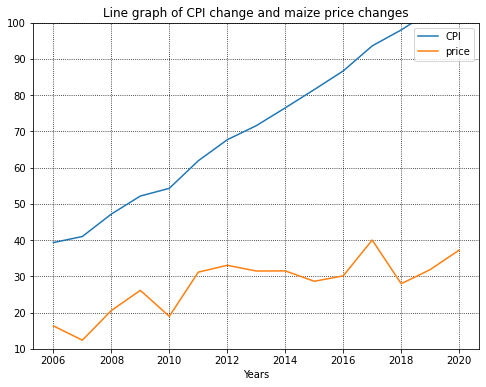

In [108]:
#we plot the graph

import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams


rcParams['figure.figsize'] = (8,6)
df15.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of CPI change and maize price changes')
plt.xlabel ("Years")
plt.ylim(10,100)


- *There exist a relationship between Consumer price index and the price 
fluctuation*.

_ *It is apparent that an increase in inflation most likely results in an increase in price though it becomes also clear that it is not inflation alone that affects prices.(other factors should be put to account)*

**1.7) To answer the research problem we compare percentage change in CPI Known as inflation with percentage change in the price of maize to see whether inflation factors into price volatility.**

Text(0.5, 0, 'Years')

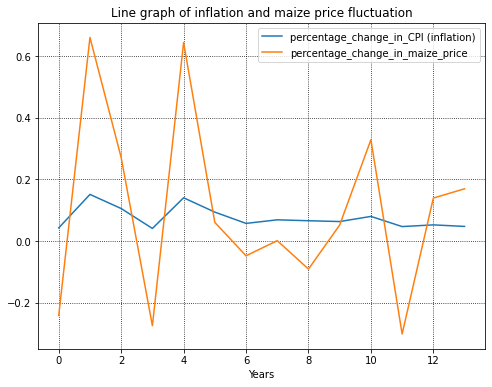

In [109]:
# Trying to plot the inflation rate and price volatility in the line graphs

# Inflation_price

import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams


rcParams['figure.figsize'] = (8,6)
Inflation_price_comparison.plot()
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of inflation and maize price fluctuation')
plt.xlabel ("Years")


*- The percentage change in CPI is identical in trend as the percentage change in maize prices painting a picture of a relational influence of direct proportionality*

# **OBJECTIVE 2**

**2) To unravel variable change in different commodities**

In [120]:
project_analysis= df13.groupby(['commodity', 'year', 'annual_rainfall'])['price'].mean()

project_analysis = project_analysis.reset_index()
project_analysis.head(22)

,commodity,year,annual_rainfall,price
0,Bananas,2020,791.50,8.000000
1,Beans,2006,769.28,38.663958
2,Beans,2007,692.64,39.169375
3,Beans,2008,661.27,55.564556
4,Beans,2009,655.41,55.997133
5,Beans,2010,650.73,52.010167
6,Beans,2011,626.92,66.397067
7,Beans,2012,783.07,62.825167
8,Beans,2013,740.69,70.111682
9,Beans,2014,608.32,71.767433


In [121]:
project_analysis.commodity.unique()

array(['Bananas', 'Beans', 'Beans (dry)', 'Bread', 'Cooking fat',
       'Fuel (diesel)', 'Fuel (kerosene)', 'Fuel (petrol-gasoline)',
       'Kale', 'Maize', 'Maize (white)', 'Maize flour', 'Meat (beef)',
       'Meat (goat)', 'Milk (UHT)', 'Milk (cow, pasteurized)',
       'Oil (vegetable)', 'Onions (red)', 'Potatoes (Irish)', 'Rice',
       'Sorghum', 'Sugar', 'Tomatoes', 'Wheat flour'], dtype=object)

In [122]:
# Creating our samples
# sample out beans data
beans= project_analysis[project_analysis['commodity'] == 'Beans (dry)']

# Creating our samples
# sample out beans data
beans= project_analysis[project_analysis['commodity'] == 'Beans (dry)']


# sample out maize data
maize = project_analysis[project_analysis['commodity'] == 'Maize (white)']


# sample out potatoes
potatoes = project_analysis[project_analysis['commodity'] == 'Potatoes']


# sample out soghurm
sorghum = project_analysis[project_analysis['commodity'] == 'Sorghum']


# sample out bread
bread = project_analysis[project_analysis['commodity'] == 'Bread']
# sample out maize data
maize = project_analysis[project_analysis['commodity'] == 'Maize (white)']


# sample out potatoes
potatoes = project_analysis[project_analysis['commodity'] == 'Potatoes']


# sample out soghurm
sorghum = project_analysis[project_analysis['commodity'] == 'Sorghum']


# sample out bread
bread = project_analysis[project_analysis['commodity'] == 'Bread']

**2.1) The data visualization**

(10.0, 1200.0)

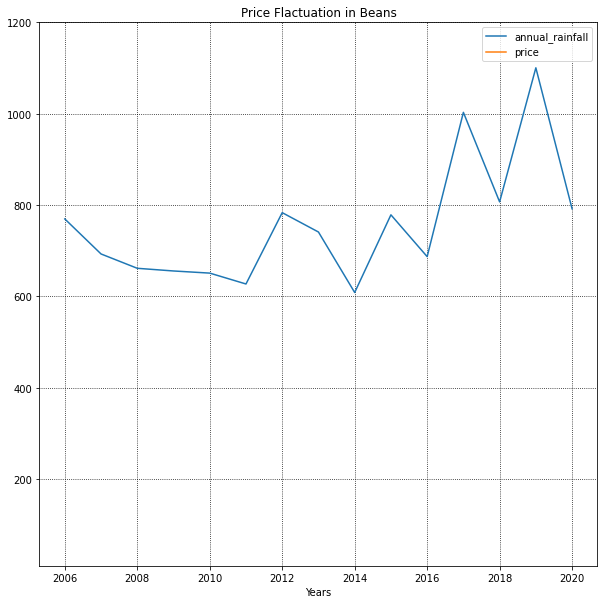

In [123]:
# Plotting our samples to analyse the flactuations for each sample over the years(2007 -2021)

import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams

beans.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Price Flactuation in Beans')
plt.xlabel ("Years")
plt.ylim(10,1200)

(10.0, 1500.0)

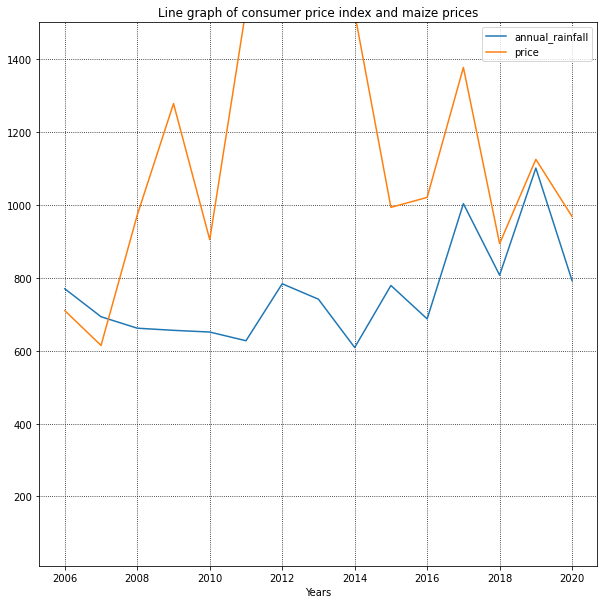

In [124]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams

maize.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of consumer price index and maize prices')
plt.xlabel ("Years")
plt.ylim(10,1500)

(10.0, 1500.0)

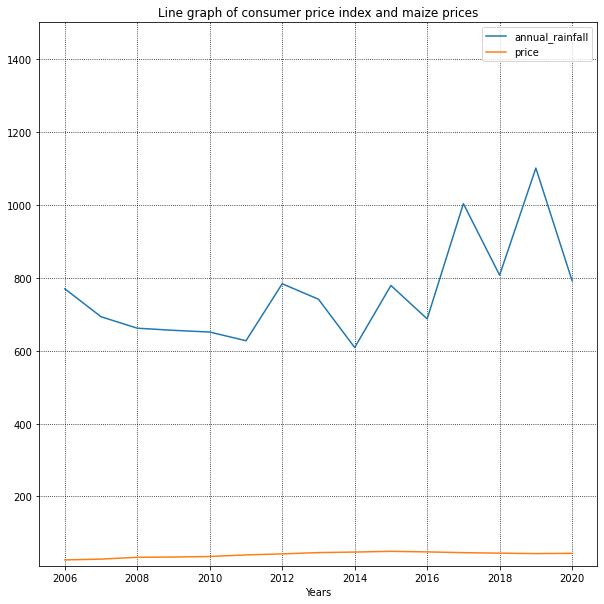

In [125]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams

bread.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of consumer price index and maize prices')
plt.xlabel ("Years")
plt.ylim(10,1500)

(10.0, 1500.0)

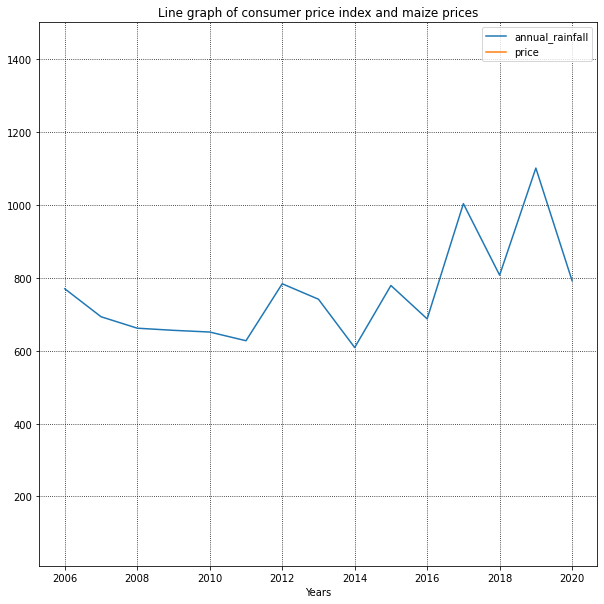

In [126]:
sorghum.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of consumer price index and maize prices')
plt.xlabel ("Years")
plt.ylim(10,1500)


*- According to the analysis it became profound that different commodities had different price fluctuation. Hence price volatility varied in=according to the commodity in question.*

# **OBJECTIVE 3**

**3) ASSESSING THE ECONOMIC STATE AT DIFFERENT PRICE FLUCTUATIONS**

In [110]:
# We first define a new variable that contains the grouped dataset relevant to our research problem

economic_state = df13.groupby(['year', 'GDP_growth_annual%', 'commodity'])['price'].mean()
economic_state.head(30)


year  GDP_growth_annual%  commodity              
2006  0.064725            Beans                        38.663958
                          Beans (dry)                2599.399167
                          Bread                        26.166667
                          Maize                        16.315833
                          Maize (white)               709.330938
                          Milk (cow, pasteurized)      22.500000
                          Oil (vegetable)             120.250000
                          Potatoes (Irish)           1035.276799
                          Sorghum                    1651.061124
2007  0.068507            Beans                        39.169375
                          Beans (dry)                2549.496500
                          Bread                        28.333333
                          Maize                        12.385278
                          Maize (white)               614.079479
                          Milk (cow, pas

**3.1) Resetting the index of the new formed dataset.**

In [111]:
# We now reset the index inorder to get the column names for the grouped data

economic_state = df13.groupby(['year', 'GDP_growth_annual%','commodity'])['price'].mean()
df20 = economic_state.reset_index()
df20.head(30)

,year,GDP_growth_annual%,commodity,price
0,2006,0.064725,Beans,38.663958
1,2006,0.064725,Beans (dry),2599.399167
2,2006,0.064725,Bread,26.166667
3,2006,0.064725,Maize,16.315833
4,2006,0.064725,Maize (white),709.330938
5,2006,0.064725,"Milk (cow, pasteurized)",22.500000
6,2006,0.064725,Oil (vegetable),120.250000
7,2006,0.064725,Potatoes (Irish),1035.276799
8,2006,0.064725,Sorghum,1651.061124
9,2007,0.068507,Beans,39.169375


**3.2) We employ sample statistics to test the research problem**

In [112]:
# The sample we used was Maize because it was the staple food

df21 = df20[df20['commodity'] == 'Maize']
df21


,year,GDP_growth_annual%,commodity,price
3,2006,0.064725,Maize,16.315833
12,2007,0.068507,Maize,12.385278
21,2008,0.002323,Maize,20.559881
30,2009,0.033069,Maize,26.123762
39,2010,0.080585,Maize,18.956071
48,2011,0.051211,Maize,31.154067
57,2012,0.045687,Maize,33.040167
66,2013,0.037978,Maize,31.460583
78,2014,0.050201,Maize,31.498333
90,2015,0.049677,Maize,28.634273


**3.3) We now develop a new criteria for testing the research problem.**

**3.3.1)We also get the percentage change in GDP fluctuation**

In [113]:
#Percentage change of GPD and percentage change in maize prices. 

percentage_change_GDP = df21['GDP_growth_annual%'].pct_change()
percentage_change_GDP
df22 = percentage_change_GDP.reset_index()
df22
df22.drop(["index"], axis=1 , inplace = True)
df22
df23 = df22.drop([0], axis=0)
df23
df24 = df23.reset_index()
df24
df24.drop(["index"], axis=1 , inplace = True)
df24
df24.rename({'GDP_growth_annual%':'percentage_change_in_GDP '}, axis='columns', inplace = True)
df24


,percentage_change_in_GDP
0,0.058437
1,-0.966094
2,13.236700
3,1.436837
4,-0.364507
5,-0.107872
6,-0.168721
7,0.321830
8,-0.010436
9,-0.151821


**3.4)We also get the percentage change in Maize price fluctuation**

In [114]:
#Percentage change of maize prices giving a picture of the price flactuation.

percentage_change_maize = df21['price'].pct_change()
percentage_change_maize
df25 = percentage_change_maize.reset_index()
df25
df25.drop(["index"], axis=1 , inplace = True) 
df25
df26 = df25.drop([0], axis=0)
df26
df27 = df26.reset_index()
df27
df27.drop(["index"], axis=1 , inplace = True)
df27
df27.rename({'price':'percentage_change_in_maize_price'}, axis='columns', inplace = True)
df27

,percentage_change_in_maize_price
0,-0.240904
1,0.660026
2,0.270618
3,-0.274374
4,0.643488
5,0.060541
6,-0.047808
7,0.001200
8,-0.090927
9,0.051958


**3.5) We merge the two dataset into a viable dataset to be used for plotting.**

In [115]:
# merging the two datasets for plotting

GDP_price_comparison = df24.join(df27)
GDP_price_comparison

,percentage_change_in_GDP,percentage_change_in_maize_price
0,0.058437,-0.240904
1,-0.966094,0.660026
2,13.236700,0.270618
3,1.436837,-0.274374
4,-0.364507,0.643488
5,-0.107872,0.060541
6,-0.168721,-0.047808
7,0.321830,0.001200
8,-0.010436,-0.090927
9,-0.151821,0.051958


**3.6) To have a basis for comparison we first plot the dataset with a collective average of the commodities.**

Text(0.5, 1.0, 'Line graph of GDP growth and price')

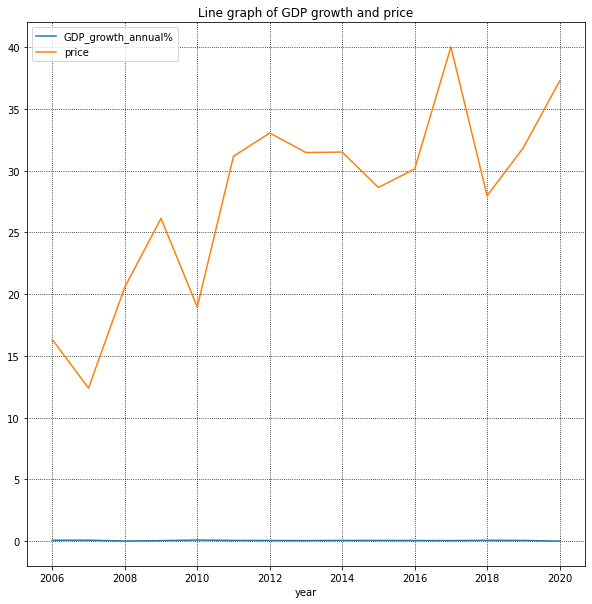

In [116]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,10)
df21.plot(x= "year")
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of GDP growth and price')

**3.7) To plot a line graph of the percentage change in GDP with a Line graph of percentage change in prices so as to paint a picture of whether the economic state affects commodity prices.**

Text(0.5, 0, 'Years')

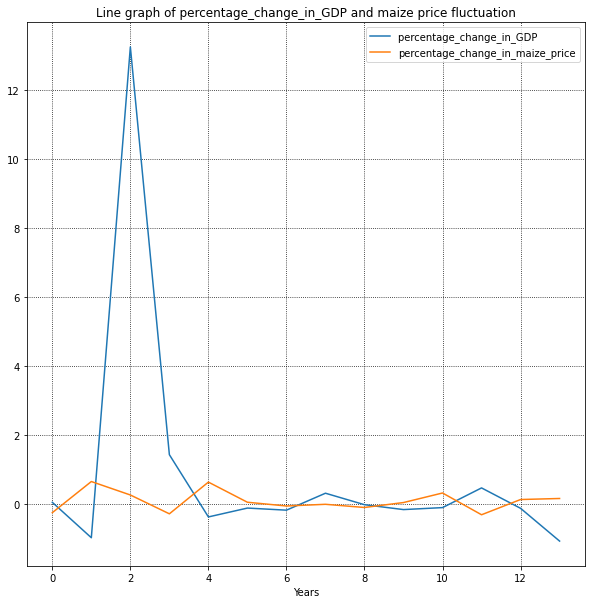

In [117]:
# We now plot the line graph and study the individual shapes and trendline of each unit of comparison.

rcParams['figure.figsize'] = (10,10)
GDP_price_comparison.plot()
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of percentage_change_in_GDP and maize price fluctuation')
plt.xlabel ("Years")

*- We found out that the percentage change in GDP wasnt exactly proportional to the percentage change in commodity prices ie like the sample maize we used.*

# **OBJECTIVE 4**

**4.1) ANALYSING THE COMMODITY MOST AFFECTED BY FLACTUATION**

In [127]:
# percentage change in inflation

df17

,percentage_change_in_CPI (inflation)
0,0.042705
1,0.151139
2,0.105374
3,0.040838
4,0.140220
5,0.093783
6,0.057175
7,0.068782
8,0.065820
9,0.063176


In [128]:
products = df13['commodity']
products

0                 Maize
1         Maize (white)
2                 Beans
3           Beans (dry)
4         Maize (white)
             ...       
600               Maize
601       Maize (white)
602    Potatoes (Irish)
603             Sorghum
604         Beans (dry)
Name: commodity, Length: 605, dtype: object

In [129]:
# merging the 2 datasets for plotting

most_affected = df17.join(products)
most_affected

,percentage_change_in_CPI (inflation),commodity
0,0.042705,Maize
1,0.151139,Maize (white)
2,0.105374,Beans
3,0.040838,Beans (dry)
4,0.140220,Maize (white)
5,0.093783,Potatoes (Irish)
6,0.057175,Sorghum
7,0.068782,Beans (dry)
8,0.065820,Maize (white)
9,0.063176,Bread


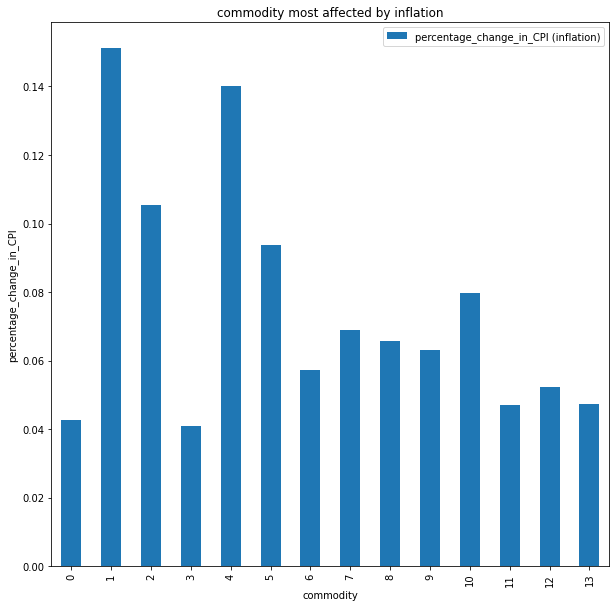

In [130]:
# plotting

import pandas as pd
import matplotlib.pyplot as plt


most_affected
most_affected.plot(kind = 'bar')
plt.xlabel('commodity')
plt.ylabel('percentage_change_in_CPI')
plt.title('commodity most affected by inflation')
plt.show()

*- According the analyss, we found out that the most affected commodity due to price inflation was maize (white)*